# Restaurant Revenue Prediction

## Life cycle of Machine learning Project

1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

## 1. Problem Statement

This project tries to understand how various factors impact the revenue of a restaurant and tries to predict it as well.

## 2. Data Collection

The dataset was acquired from: https://www.kaggle.com/datasets/mrsimple07/restaurants-revenue-prediction/data

### 2.1 Importing data and required packages

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('data\Restaurant_revenue.csv')
df.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121


In [9]:
df.shape

(1000, 8)

### 2.2 Data Information

1. **Number_of_Customers**: The count of customers visiting the restaurant.
2. **Menu_Price**: Average menu prices at the restaurant.
3. **Marketing_Spend**: Expenditure on marketing activities.
4. **Cuisine_Type**: The type of cuisine offered (Italian, Mexican, Japanese, American)
5. **Average_Customer_Spending**: Average spending per customer.
6. **Promotions**: Binary indicator (0 or 1) denoting whether promotions were conducted.
7. **Reviews**: Number of reviews received by the restaurant.
8. **Monthly_Revenue**: Simulated monthly revenue, the target variable for prediction.

## 3. Data Checks to perform

### 3.1 Checking Missing Values

In [10]:
df.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

### 3.2 Checking for duplicates

In [11]:
df.duplicated().sum()

0

### 3.3 Checking Datatypes

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


### 3.4 Checking for the number of unique values in each column

In [13]:
df.nunique()

Number_of_Customers            90
Menu_Price                   1000
Marketing_Spend              1000
Cuisine_Type                    4
Average_Customer_Spending    1000
Promotions                      2
Reviews                       100
Monthly_Revenue              1000
dtype: int64

### 3.5 Check Statistics of the Data

In [14]:
df.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


**Insights**

1. Number_of_Customers: The restaurant receives an average of 53.27 customers per month, with a significant variability (std = 26.36), suggesting fluctuations in customer traffic.
2. Average_Customer_Spending: On average, customers spend 29.48 dollars, closely aligned with the mean menu price of 30.22 dollars, indicating pricing is well-matched to customer spending habits.
3. Menu_Price: Prices range from 10 dollars to 50 dollars, with a mean of 30.22 dollars. The standard deviation (11.28) indicates diverse pricing across the menu, catering to various spending capacities.
4. Marketing_Spend: The average marketing spend is approximately 9.96 dollars, with notable variation (std = 5.85). This suggests differing marketing strategies, potentially impacting customer inflow.
5. Promotions: Promotions are used roughly 50% of the time (mean = 0.497). Their binary nature (0 or 1) and standard deviation (0.50) imply strategic application, possibly correlating with high customer turnout periods.
6. Reviews: With an average of 49.84 reviews, there’s a considerable range (std = 29.23), from no reviews to 99. This variation could influence the restaurant's reputation and subsequent customer decisions.
7. Monthly_Revenue: Monthly Revenue: The average monthly revenue is 268.72 dollars, with a significant standard deviation (103.98). The revenue distribution indicates that while some months are highly profitable (max = 563.38), others may incur losses (min = -28.98).

## 4. Exploring Data

### 4.1 Which columns are categorical and numerical ?

In [15]:
num_col = [col for col in df.columns if df[col].dtype != 'O']
cat_col = [col for col in df.columns if df[col].dtype == 'O']

print(f'Numerical Columns are: {num_col}')
print(f'Categorical Columns are: {cat_col}')

Numerical Columns are: ['Number_of_Customers', 'Menu_Price', 'Marketing_Spend', 'Average_Customer_Spending', 'Promotions', 'Reviews', 'Monthly_Revenue']
Categorical Columns are: ['Cuisine_Type']


### 4.2 Which columns have low cardinality ?

In [16]:
num_low_card = [col for col in num_col if df[col].nunique() < 10]
cat_low_card = [col for col in cat_col if df[col].nunique() < 10]

print(f'Low Cardinality Numerical Columns Are: {num_low_card}')
print(f'Low Cardinality Categorical Columns Are: {cat_low_card}')

Low Cardinality Numerical Columns Are: ['Promotions']
Low Cardinality Categorical Columns Are: ['Cuisine_Type']


### 4.3 What is the distribution of number of customers across the dataset ?

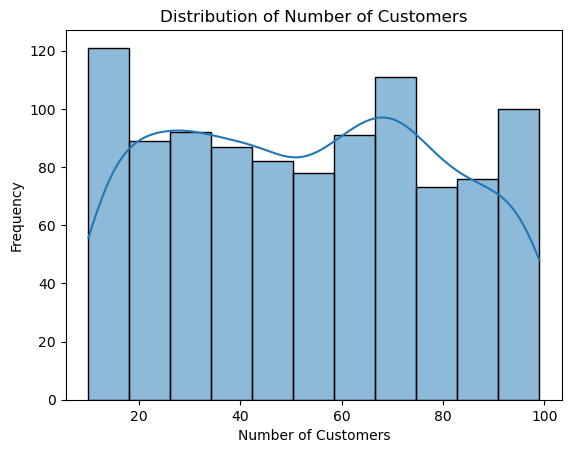

In [17]:
sns.histplot(data = df, x='Number_of_Customers', kde = True)
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Customers')
plt.show()

1. The highest frequency is observed at the lower end (10-20 customers) and another peak is at the upper end (90-100 customers). This indicates that there are significant occurrences of both low and high customer counts.
2. The middle range of customer counts (30-70 customers) shows relatively consistent frequencies, with slight dips around 50 and 80 customers. This suggests a stable but variable customer base in this range.
3. The distribution is not uniform, showing multiple peaks and troughs. The KDE curve highlights these fluctuations, indicating periods of varying customer numbers rather than a steady flow.
4. The graph hints at a bimodal distribution, with two noticeable peaks around 10-20 and 60-70 customers. This could imply that the restaurant experiences different operational states or customer behaviors (e.g., peak and off-peak times).

### 4.4 Is there a correlation between Number of Customers and Menu Price?

In [18]:
df[['Number_of_Customers','Menu_Price']].corr()

,Number_of_Customers,Menu_Price
Number_of_Customers,1.00000,0.03347
Menu_Price,0.03347,1.00000


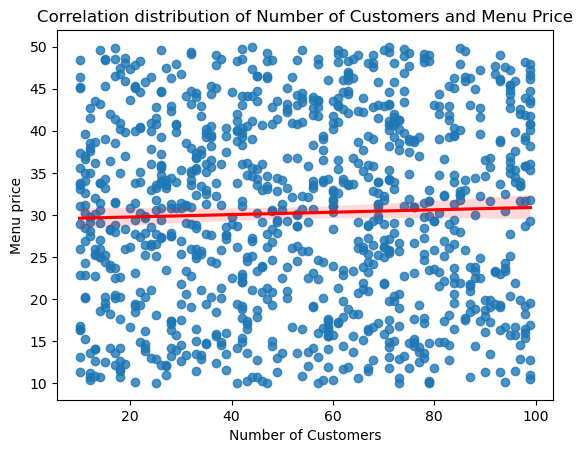

In [19]:
sns.regplot(data= df, x='Number_of_Customers', y='Menu_Price', line_kws={"color": "red"})
plt.title('Correlation distribution of Number of Customers and Menu Price')
plt.xlabel('Number of Customers')
plt.ylabel('Menu price')
plt.show()

**Insights** 

1. There exists a weak positive correlation between customer count and menu price, suggesting that changes in prices doesn't lead to customer attrition.
2. Since menu pricing does not significantly affect customer numbers, the restaurant should focus on enhancing other areas that can attract more customers. These may include improving food quality, customer service, ambiance, or running targeted marketing campaigns.
3. Given the minimal impact, the restaurant may have flexibility in adjusting menu prices without drastically affecting the customer count. This can be leveraged to optimize pricing for profitability without fearing a significant drop in customer visits.
4. With menu price having a minimal impact on customer numbers, exploring complementary revenue streams such as special events, catering services, or merchandise could enhance overall profitability without risking customer attrition.

### 4.5 Is there an increase in customer count with increase in marketing spend ?

In [20]:
df[['Number_of_Customers','Marketing_Spend']].corr()

,Number_of_Customers,Marketing_Spend
Number_of_Customers,1.000000,-0.007024
Marketing_Spend,-0.007024,1.000000


**Insights**

1. The weak negative correlation suggests that changes in marketing spend have almost no impact on the number of customers. This might imply that the current marketing strategies are not effectively driving customer traffic.
2. Given the minimal impact, it may be beneficial to reassess and potentially overhaul the marketing strategies. The current spend might not be targeting the right audience or utilizing the most effective channels.
3. Restaurants can benefit from:
   **a)** Conducting a detailed analysis of the current marketing campaigns to understand their effectiveness.
   **b)** Considering more targeted marketing efforts. Utilize customer data to create personalized and segmented marketin campaigns that are more likely to resonate with specific customer groups and drive traffic.
   **c)** Developing an integrated marketing approach that combines online and offline strategies. Leveraging social media, email marketing, influencer partnerships, and community events could provide a more holistic reach and engagement. 

### 4. 6 How does customer spending impact customer count ?

In [21]:
df[['Number_of_Customers','Average_Customer_Spending']].corr()

,Number_of_Customers,Average_Customer_Spending
Number_of_Customers,1.000000,-0.013898
Average_Customer_Spending,-0.013898,1.000000


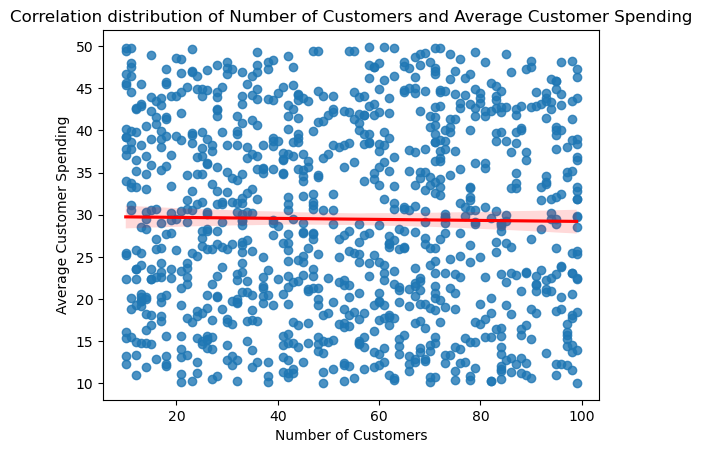

In [22]:
sns.regplot(data= df, x='Number_of_Customers', y='Average_Customer_Spending', line_kws={"color": "red"})
plt.title('Correlation distribution of Number of Customers and Average Customer Spending')
plt.xlabel('Number of Customers')
plt.ylabel('Average Customer Spending')
plt.show()

The correlation matrix indicates a very weak negative correlation (-0.013898) between the number of customers and average customer spending, suggesting that changes in customer count do not significantly impact the average spending per customer.

### 4.7 Do promotions impact customer count ?

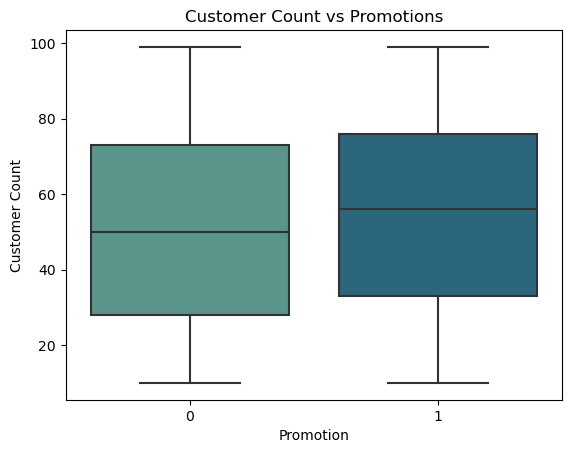

In [23]:
sns.boxplot(data = df, x='Promotions', y = 'Number_of_Customers', palette='crest')
plt.title('Customer Count vs Promotions')
plt.xlabel('Promotion')
plt.ylabel('Customer Count')
plt.show()

1. The median customer count is slightly higher for the promotion group (1) compared to the no-promotion group (0). This indicates a small positive effect of promotions on attracting customers.
2. The range is approximately the same for both groups, with customer counts ranging from about 10 to 100.
3. The whiskers are similar in length for both groups, indicating that the spread of customer counts is comparable.
4. There are no significant outliers in either group, suggesting that the promotion strategies do not produce extreme variations in customer counts.
5. While promotions appear to have a slight positive effect on median customer count, the overall impact is modest. This suggests that while promotions are beneficial, they may not be the most powerful lever for significantly increasing customer volume.It may be advantageous to refine promotion strategies.

### 4.8 Do number of reviews impact customer count ?

In [24]:
df[['Number_of_Customers','Reviews']].corr()

,Number_of_Customers,Reviews
Number_of_Customers,1.00000,-0.01014
Reviews,-0.01014,1.00000


1. The weak negative correlation suggests that the number of reviews has almost no impact on the number of customers. This might imply that either the reviews are not reaching potential customers effectively, or that customers do not heavily rely on the reviews to make their dining decisions.
2. It might also suggest that the quality and sentiment of reviews (positive or negative) could be more important than the sheer number of reviews. Positive reviews might attract new customers, while negative reviews might deter them, but the total count alone isn't a significant factor.

### 4.9 What is the relation between number of customers and monthly revenue ?

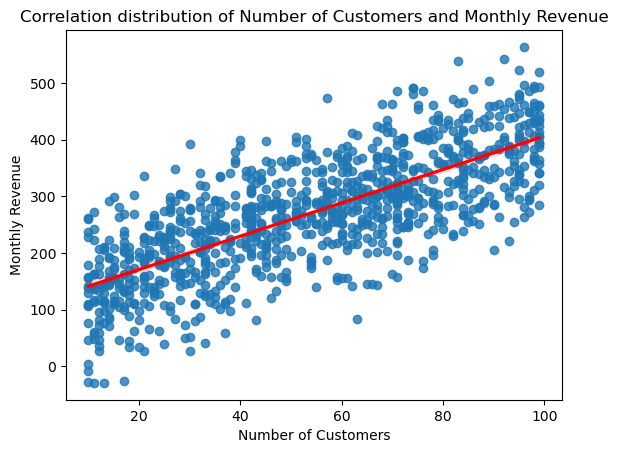

In [25]:
sns.regplot(data= df, x='Number_of_Customers', y='Monthly_Revenue', line_kws={"color": "red"})
plt.title('Correlation distribution of Number of Customers and Monthly Revenue')
plt.xlabel('Number of Customers')
plt.ylabel('Monthly Revenue')
plt.show()

In [26]:
df[['Number_of_Customers','Monthly_Revenue']].corr()

,Number_of_Customers,Monthly_Revenue
Number_of_Customers,1.000000,0.745239
Monthly_Revenue,0.745239,1.000000


1. The correlation coefficient between the number of customers and monthly revenue is 0.745239.
2. This value indicates a strong positive correlation, meaning that as the number of customers increases, monthly revenue tends to increase as well.
3. Strategies aimed at attracting and retaining more customers are likely to be highly effective in driving revenue growth.

### 4.10 What is the spread of menu price ?

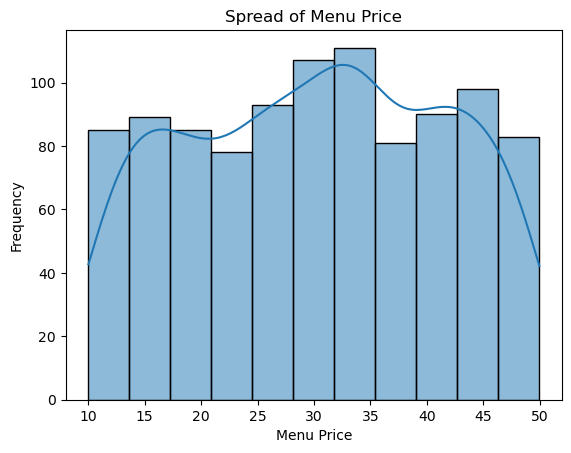

In [27]:
sns.histplot(data = df, x='Menu_Price', kde = True)
plt.xlabel('Menu Price')
plt.ylabel('Frequency')
plt.title('Spread of Menu Price')
plt.show()

1. Menu prices range from around 10 to 50 dollars. The distribution appears fairly uniform, with slight peaks and valleys.
2. The highest frequency of menu prices is observed in the 30 to 35 dollar range. There are additional notable peaks in the 20 to 25 dollar and 40 to 45 dollar ranges.
3. There are dips in frequency around 15 to 20 dollar and 45 to 50 dollar, indicating these price ranges are less common.


Given the peaks at 20-25 dollar, 30-35 dollar, and 40-45 dollar, restaurants should consider concentrating their menu items around these price ranges to match customer spending habits. To cater to a broader audience, ensure the menu includes items at various price points within the 10 to 50 dollar range. This can help attract customers with different budget levels.

### 4.11 What is the relation between menu price and marketing spend ?

In [28]:
df[['Menu_Price','Marketing_Spend']].corr()

,Menu_Price,Marketing_Spend
Menu_Price,1.000000,0.016319
Marketing_Spend,0.016319,1.000000


1. The correlation coefficient between menu price and marketing spend is 0.016319. 
2. The near-zero correlation suggests that changes in marketing spend are not associated with changes in menu prices. This implies that decisions regarding menu pricing and marketing expenditures are likely made independently.

### 4.12  Does cuisine type impact menu price ?

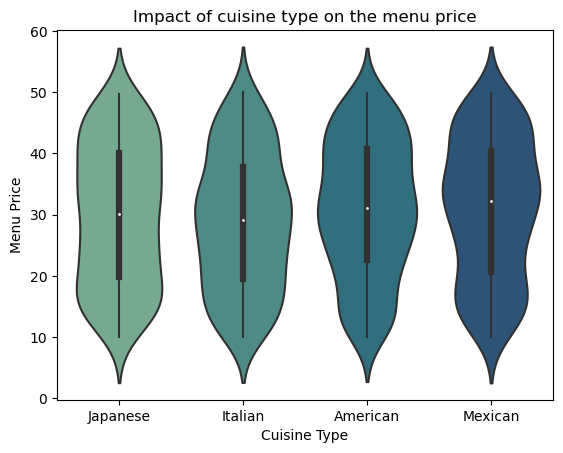

In [29]:
sns.violinplot(data = df, x='Cuisine_Type', y = 'Menu_Price', palette='crest')
plt.title('Impact of cuisine type on the menu price')
plt.xlabel('Cuisine Type')
plt.ylabel('Menu Price')
plt.show()

1. All cuisines have a range of menu prices extending from around 10 to 50 units, indicating the presence of both budget-friendly and premium options across all cuisine types.
2. Mexican Cuisine: Given the higher median and wider price range, this cuisine can leverage its premium pricing for high-quality and specialty items. Marketing should emphasize the unique and premium nature of the dishes to justify the higher prices.
3. Italian Cuisine: With a more consistent and moderate price range, Italian cuisine can focus on value for money and family dining experiences. Emphasizing consistency and quality can attract a broad customer base.
4. American Cuisine: The wider price spread suggests opportunities for both affordable and premium offerings. Segmenting the menu into budget-friendly and upscale options can cater to diverse customer segments.
5. Japanese Cuisine: Similar to American, Japanese cuisine can benefit from highlighting both affordability and premium offerings. Promotions can focus on the authenticity and variety of dishes.


### 4.13 Does menu price effect the customer spending ?

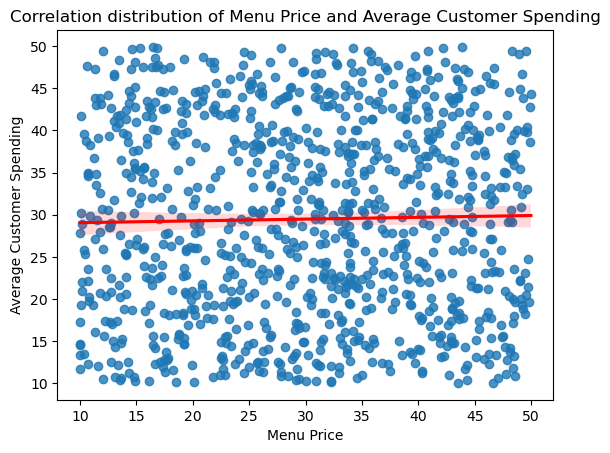

In [30]:
sns.regplot(data= df, x='Menu_Price', y='Average_Customer_Spending', line_kws={"color": "red"})
plt.title('Correlation distribution of Menu Price and Average Customer Spending')
plt.xlabel('Menu Price')
plt.ylabel('Average Customer Spending')
plt.show()

In [31]:
df[['Menu_Price','Average_Customer_Spending']].corr()

,Menu_Price,Average_Customer_Spending
Menu_Price,1.000000,0.020808
Average_Customer_Spending,0.020808,1.000000


1. A near-zero correlation suggests that changes in menu prices do not significantly influence the average spending of customers. 
2. Given the weak correlation, menu pricing should focus on delivering perceived value rather than attempting to influence overall customer spending directly. Ensure that prices reflect the quality and uniqueness of the offerings.

### 4.14 Do menu price and promotions have any relation ?

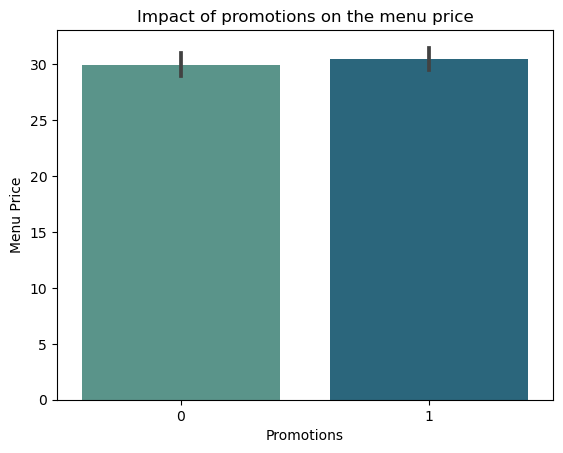

In [32]:
sns.barplot(data = df, x='Promotions', y = 'Menu_Price', palette='crest')
plt.title('Impact of promotions on the menu price')
plt.xlabel('Promotions')
plt.ylabel('Menu Price')
plt.show()

1. The small difference in average menu price suggests that promotions do not significantly affect the pricing of the menu items. This could imply that promotions are used strategically to maintain price points while providing additional value to customers (e.g., bundled deals, discounts on higher-end items).
2. The consistency indicated by the short error bars suggests that the restaurant maintains stable pricing across its menu, even during promotional periods. This stability can be beneficial for customer trust and perceived value.

### 4.15 Is there any relation between menu price and reviews ?

In [33]:
df[['Menu_Price','Reviews']].corr()

,Menu_Price,Reviews
Menu_Price,1.000000,0.003792
Reviews,0.003792,1.000000


From the above correlation matrix it is clear that a value of 0.003792 is extremely small to draw any relation between menu price and number of reviews. This indicates that other factors might be more influential in driving customer reviews. Since menu price does not significantly influence reviews, efforts should be directed towards improving food quality, customer service, and overall dining experience. Positive experiences are more likely to result in favorable reviews.

### 4.16 How does the menu price impact monthly revenue ?

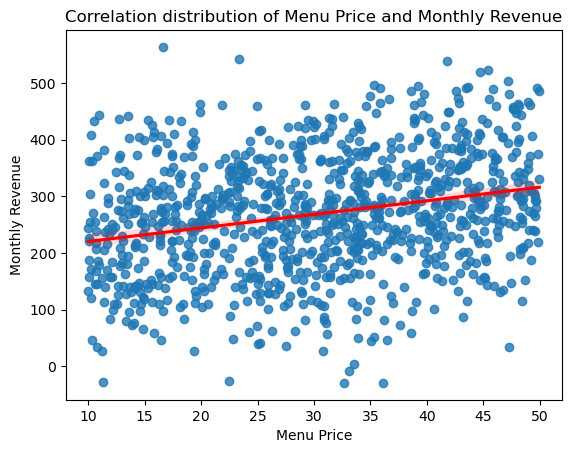

In [34]:
sns.regplot(data= df, x='Menu_Price', y='Monthly_Revenue', line_kws={"color": "red"})
plt.title('Correlation distribution of Menu Price and Monthly Revenue')
plt.xlabel('Menu Price')
plt.ylabel('Monthly Revenue')
plt.show()

In [35]:
df[['Menu_Price','Monthly_Revenue']].corr()

,Menu_Price,Monthly_Revenue
Menu_Price,1.000000,0.259579
Monthly_Revenue,0.259579,1.000000


1. This value indicates a weak positive correlation, suggesting that there is a tendency for higher menu prices to be associated with higher monthly revenue, but the relationship is not strong.
2. While there is some positive relationship between menu prices and monthly revenue, the weak correlation suggests that other factors also play significant roles in driving revenue. Simply increasing menu prices may not lead to a proportionate increase in monthly revenue.

### 4.18 How is the marketing spend distributed ? 

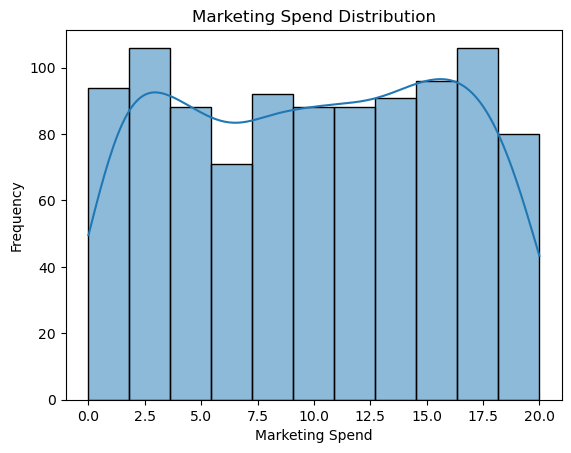

In [36]:
sns.histplot(data = df, x='Marketing_Spend', kde = True)
plt.xlabel('Marketing Spend')
plt.ylabel('Frequency')
plt.title('Marketing Spend Distribution')
plt.show()

1. The highest frequency of marketing spend is observed around 2.5 dollars and 15 dollars.There are additional notable peaks at 10 dollars and 17.5 dollars.
2. Concentrate marketing efforts around the spend levels of 2.5, 10, 15, and 17.5 dollars. These levels are the most frequently utilized, suggesting they might be the sweet spots for effective marketing expenditure.
3. Allocate more budget to the identified peaks. For instance, campaigns with a budget of 15 dollars might be particularly effective, given its high frequency.

### 4.19 Does cuisine type impact marketing spend ?

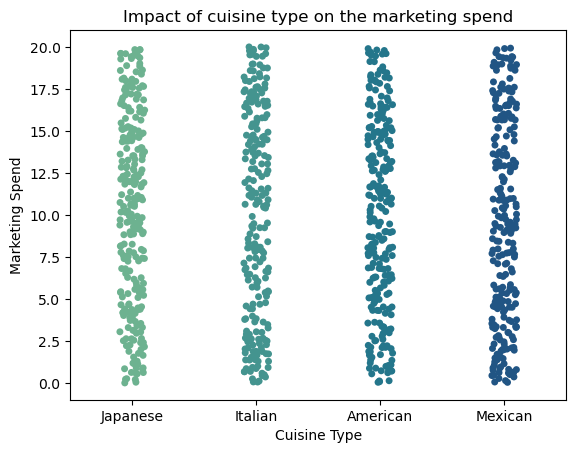

In [37]:
sns.stripplot(data = df, x='Cuisine_Type', y = 'Marketing_Spend', palette='crest')
plt.title('Impact of cuisine type on the marketing spend')
plt.xlabel('Cuisine Type')
plt.ylabel('Marketing Spend')
plt.show()

1. The clustering of points indicates that most restaurants, regardless of cuisine type, tend to spend similarly on marketing. There is no significant skew or trend indicating that one cuisine type consistently spends more or less on marketing.
2. The similar range of marketing spend across different cuisine types suggests that restaurants are likely adopting a standardized approach to their marketing budgets. This implies a balanced allocation of marketing resources irrespective of the cuisine type.
3. This uniformity in spending can be beneficial in ensuring that all cuisine types get equal exposure and marketing efforts, helping to maintain a balanced customer reach and brand presence.

### 4.19 What is the correlation between marketing spend and average customer spending ?

In [38]:
df[['Marketing_Spend','Average_Customer_Spending']].corr()

,Marketing_Spend,Average_Customer_Spending
Marketing_Spend,1.000000,-0.058586
Average_Customer_Spending,-0.058586,1.000000


1. The weak inverse correlation suggests that higher marketing spend does not significantly impact the average amount each customer spends. In some cases, increased marketing spend might even slightly correlate with lower average customer spending, although the effect is minimal.
2. Since increased marketing spend does not strongly correlate with higher average customer spending, focus should be on targeted marketing campaigns. Ensuring that marketing efforts are directed towards attracting high-value customers who are likely to spend more.
3. Analyzing the content and messaging of marketing campaigns. Tailoring messages to emphasize value, quality, and unique selling points that can encourage customers to spend more.

### 4.20 How to promotions impact marketing spend ?

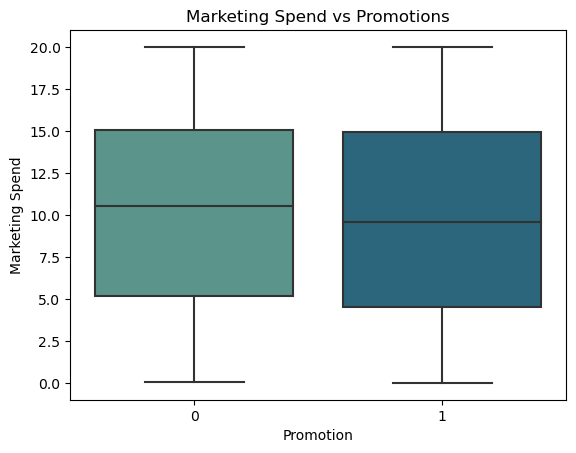

In [39]:
sns.boxplot(data = df, x='Promotions', y = 'Marketing_Spend', palette='crest')
plt.title('Marketing Spend vs Promotions')
plt.xlabel('Promotion')
plt.ylabel('Marketing Spend')
plt.show()

1. The marketing spend is similar for both groups, it suggests that the mere use of promotions does not necessarily correlate with higher or lower marketing expenditures.
2. The effectiveness of promotions should be assessed based on other performance metrics such as customer acquisition, retention rates, and revenue growth.
3. Given the similar spending patterns, restaurants can consider reallocating portions of their marketing budget to test new promotional strategies.
4. Focus on optimizing the mix of promotions and other marketing activities to maximize ROI.

### 4.21 Does number of reveiws impact marketing spend ?

In [40]:
df[['Marketing_Spend','Reviews']].corr()

,Marketing_Spend,Reviews
Marketing_Spend,1.00000,-0.03147
Reviews,-0.03147,1.00000


The correlation coefficient of -0.03147 suggests an extremely weak inverse relationship between marketing spend and the number of reviews. This implies that changes in marketing spend are almost independent of the number of reviews received.

### 4.22 How does marketing spend and monthly revenue correlate ?

In [41]:
df[['Marketing_Spend','Monthly_Revenue']].corr()

,Marketing_Spend,Monthly_Revenue
Marketing_Spend,1.000000,0.269929
Monthly_Revenue,0.269929,1.000000


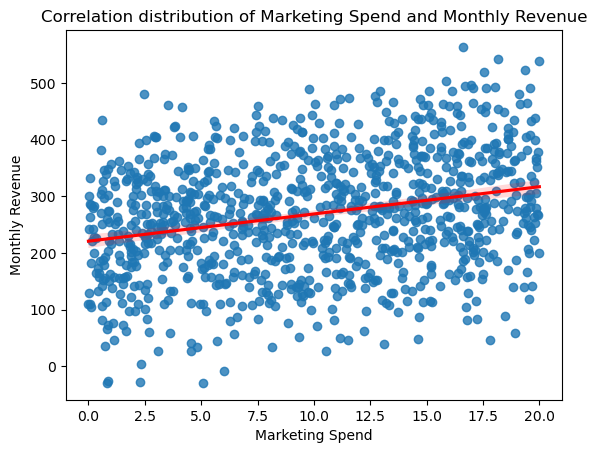

In [42]:
sns.regplot(data= df, x='Marketing_Spend', y='Monthly_Revenue', line_kws={"color": "red"})
plt.title('Correlation distribution of Marketing Spend and Monthly Revenue')
plt.xlabel('Marketing Spend')
plt.ylabel('Monthly Revenue')
plt.show()

1. The correlation coefficient of 0.269929 suggests a weak positive relationship between marketing spend and monthly revenue. This implies that an increase in marketing spend tends to be associated with an increase in monthly revenue, albeit the relationship is not very strong.
2. In practical terms, increasing the marketing budget may contribute to higher revenue, but other factors also play significant roles in determining revenue.
3. Given the weak correlation, it is essential to optimize marketing spend rather than just increasing it. Identify the most effective marketing channels and campaigns that yield the highest return on investment (ROI).

### 4.21 Is there any impact of cuisine type on customer spending ?

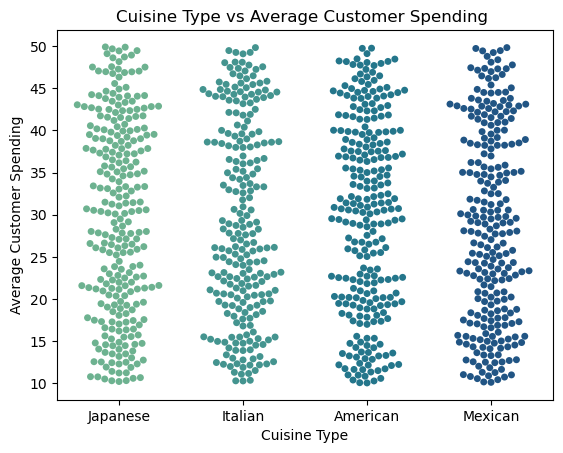

In [43]:
sns.swarmplot(data = df, x='Cuisine_Type', y = 'Average_Customer_Spending', palette='crest')
plt.title('Cuisine Type vs Average Customer Spending ')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Customer Spending')
plt.show()

1. Japanese Cuisine: Shows a wide range of average customer spending, with data points spread fairly evenly from about 10 to 50 dollars.
2. Italian Cuisine: Also exhibits a wide range of spending, with a noticeable concentration of data points around the middle values.
3. American Cuisine: Similar to Japanese and Italian, American cuisine displays a broad range but seems to have more clustered spending patterns at certain intervals.
4. Mexican Cuisine: Displays a range of customer spending, but data points seem more evenly distributed across the spectrum compared to the other cuisines.

Each cuisine type has a varied distribution of customer spending, indicating that customers are willing to spend within a broad range regardless of cuisine type. There is no single cuisine type that stands out as having significantly higher or lower average customer spending compared to the others.

### 4.22 Is there any specific cuisine type that is promoted more ?

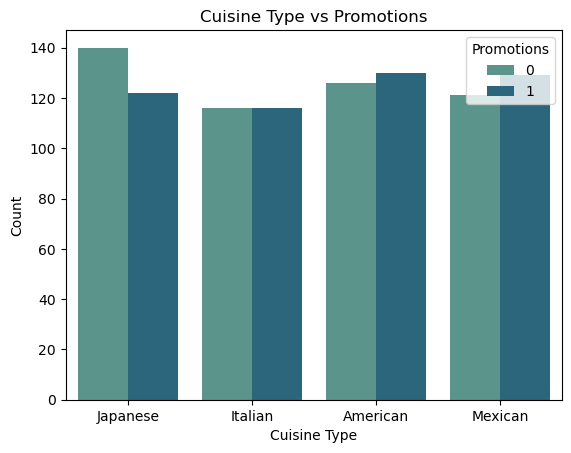

In [44]:
sns.countplot(data=df, x='Cuisine_Type', hue='Promotions', palette='crest')
plt.title('Cuisine Type vs Promotions')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.legend(title='Promotions', loc='upper right')
plt.show()

1. From the above plot, it is evident that 'American' and 'Mexican' cuisines are promoted more frequently. Since these two cuisines have higher menu prices, it makes sense to promote them more to attract customers to purchase these relatively pricey dishes, thereby generating more revenue.
2. Italian cuisine, being the least expensive on the menu, does not seem to be affected by promotions.
3. Japanese cuisine is promoted less compared to the other cuisines. This could be because customers are already more aware of Japanese dishes and order them more frequently, reducing the need for promotions.

### 4.23 Does any specific cuisine attract more customers ?

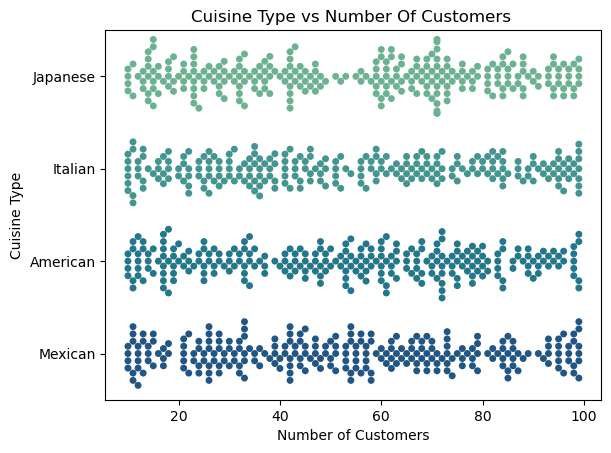

In [45]:
sns.swarmplot(data = df, x='Number_of_Customers', y = 'Cuisine_Type', palette='crest', orient='h')
plt.title('Cuisine Type vs Number Of Customers ')
plt.xlabel('Number of Customers')
plt.ylabel('Cuisine Type')
plt.show()

In [46]:
df.groupby('Cuisine_Type')['Number_of_Customers'].describe()

,count,mean,std,min,25%,50%,75%,max
Cuisine_Type,,,,,,,,
American,256.0,53.445312,26.013966,10.0,30.75,55.0,75.00,99.0
Italian,232.0,52.771552,27.139761,10.0,30.00,50.0,75.25,99.0
Japanese,262.0,53.973282,26.441927,10.0,31.00,59.0,74.00,99.0
Mexican,250.0,52.820000,26.049913,10.0,30.25,53.0,73.00,99.0


1. The distribution of the number of customers across all cuisines appears fairly even, with similar statistical measures for each cuisine.
2. Japanese cuisine seems to be slightly more favored than the other cuisines. Efforts can be made to promote popular Japanese dishes to attract even more customer attention.
3. For the other cuisines, a re-analysis of the menu could identify areas for improvement. Additionally, introducing discounts, combo packs, or budget-friendly options could help attract more customers to these cuisines.

### 4.24 Does any specific cuisine have more reviews than the other ?

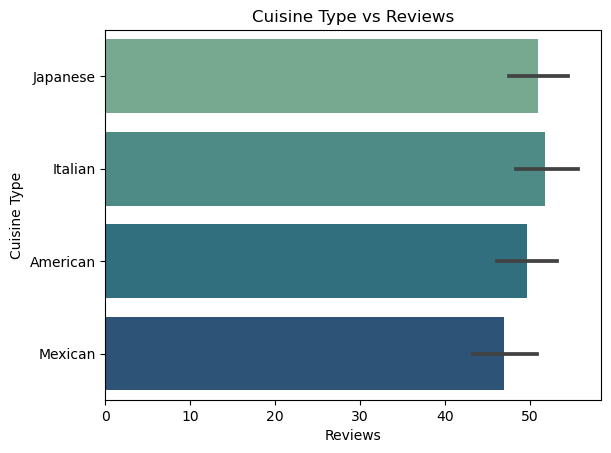

In [47]:
sns.barplot(data = df, x='Reviews', y = 'Cuisine_Type', palette='crest', orient='h')
plt.title('Cuisine Type vs Reviews')
plt.xlabel('Reviews')
plt.ylabel('Cuisine Type')
plt.show()

1. Japanese and Italian cuisine have the highest number of reviews. This indicates a strong customer interest and engagement with Japanese and Italian dishes. Given their popularity, there is a significant opportunity to leverage this interest to drive more revenue through targeted marketing and promotions.
2. Since Japanese and Italian cuisine already have high customer engagement, the focus could be on enhancing the dining experience or introducing new dishes to keep the menu exciting. For Mexican and American cuisines, marketing campaigns highlighting unique aspects or special deals could help increase customer reviews and engagement.
3. The high number of reviews across all cuisines also implies that customers are willing to share their dining experiences. Ensuring high food quality and excellent service across all cuisine types is crucial to maintain and potentially increase positive reviews, which can drive more customer visits and revenue.

### 4.25 What impact do different cuisines have on monthly revenue ?

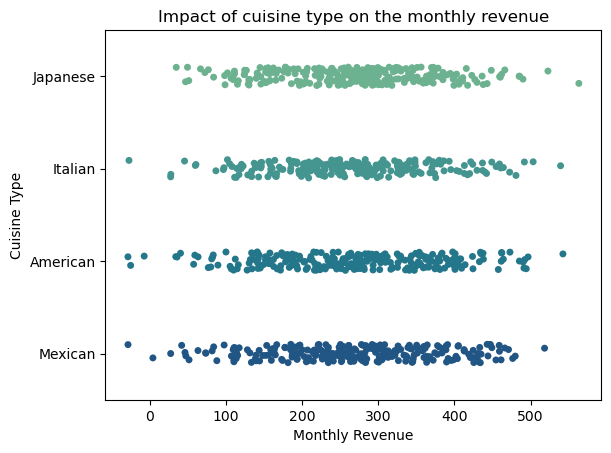

In [48]:
sns.stripplot(data = df, x='Monthly_Revenue', y = 'Cuisine_Type', palette='crest')
plt.title('Impact of cuisine type on the monthly revenue')
plt.xlabel('Monthly Revenue')
plt.ylabel('Cuisine Type')
plt.show()

1. The monthly revenue distribution for Japanese, Italian, American, and Mexican cuisines is relatively consistent, with all cuisines generating revenue across a wide range. This indicates that no single cuisine type dominates in terms of monthly revenue, suggesting a diverse customer base with varied culinary preferences.

2. Among the cuisines, Japanese cuisine appears to have some outliers with exceptionally high monthly revenue, close to 500. This suggests that while Japanese cuisine has a broad appeal, there are specific instances or locations where it performs exceptionally well. Targeted marketing and promotional efforts could further capitalize on this potential.

3. Italian, American, and Mexican cuisines also show a steady revenue performance, though without as many high-revenue outliers as Japanese cuisine. These cuisines have a solid customer base, but there may be room for growth through enhanced marketing strategies or menu innovation.

### 4.26 What is the distribution of average customer spending ?

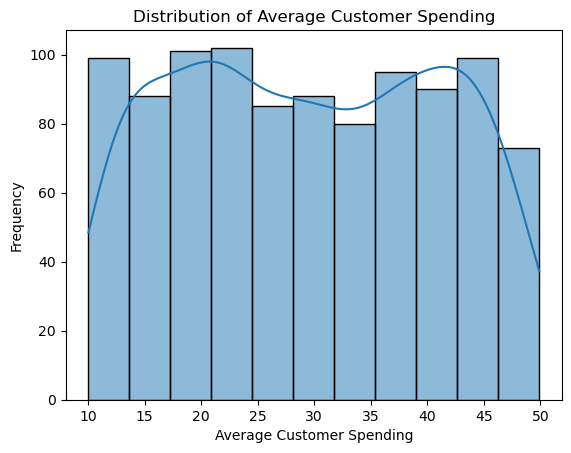

In [49]:
sns.histplot(data = df, x='Average_Customer_Spending', kde = True)
plt.xlabel('Average Customer Spending')
plt.ylabel('Frequency')
plt.title('Distribution of Average Customer Spending')
plt.show()

1. The distribution of average customer spending is relatively uniform across different spending ranges, with each bin having a comparable frequency. This indicates that the restaurant attracts customers with diverse spending habits, suggesting a broad appeal across different customer segments.
2. There is a notable peak in customer spending around the 15 to 25 dollar range. This suggests that a significant proportion of customers tend to spend within this bracket. Targeting promotions or menu items around this spending range could potentially attract a larger customer base and boost overall revenue.
3. Despite the overall even distribution, the frequencies dip slightly in the higher spending brackets (above 40 dollars). This indicates an opportunity to develop strategies that encourage higher spending, such as premium menu items, exclusive offers, or value-added services that can appeal to high-spending customers.
4. The extremes of the spending range (below 15 dollars and above 45 dollars) show lower frequencies. This could suggest that while there is a consistent customer base, extreme low or high spending is less common. However, there is a notable presence at the 10 dollar mark, indicating a segment of highly budget-conscious customers. Offering value meals or budget-friendly options might appeal to this segment.

### 4.27 What is the impact of promotions on customer spending ?

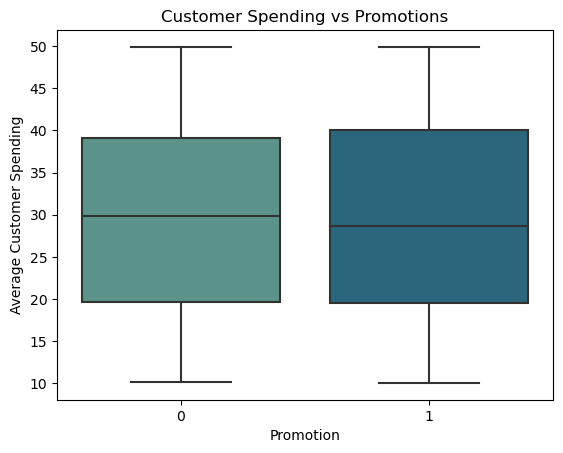

In [50]:
sns.boxplot(data = df, x='Promotions', y = 'Average_Customer_Spending', palette='crest')
plt.title('Customer Spending vs Promotions')
plt.xlabel('Promotion')
plt.ylabel('Average Customer Spending')
plt.show()

1. The median average customer spending for both promoted (1) and non-promoted (0) categories is around 30 dollars. This suggests that promotions do not significantly shift the central tendency of customer spending. In other words, on average, customers spend roughly the same amount regardless of whether promotions are in place.
2. Both box plots show a similar interquartile range (IQR), indicating that the middle 50% of spending values are spread similarly for both promoted and non-promoted conditions. This reflects that promotions do not dramatically alter the typical spending behavior of the majority of customers.
3. The range of spending, represented by the whiskers, extends from approximately 10 to 50 dollars in both cases, with no significant outliers. This consistent range suggests that promotions are not attracting extreme high or low spenders disproportionately.
4. Despite similar medians and spreads, promotions might have subtle effects not immediately visible in the plot. Promotions could influence the frequency of visits, customer satisfaction, or long-term loyalty, which are not directly captured by this plot.

### 4.28 Can customer spending impact reviews ?

In [51]:
df[['Average_Customer_Spending','Reviews']].corr()

,Average_Customer_Spending,Reviews
Average_Customer_Spending,1.000000,0.054163
Reviews,0.054163,1.000000


1. The correlation coefficient between average customer spending and the number of reviews is 0.054163. This indicates a very weak positive correlation, as customer spending increases the number of reviews might slightly increase, but the relationship is not strong.
2. The weak correlation suggests that higher spending customers do not necessarily leave more reviews. Conversely, customers who leave reviews are not significantly higher spenders compared to those who do not.
3. Since reviews are not strongly correlated with spending, efforts to encourage reviews should target all customers, not just high spenders.

### 4.29 How does customer spending influence monthly revenue ? 

In [52]:
df[['Average_Customer_Spending','Monthly_Revenue']].corr()

,Average_Customer_Spending,Monthly_Revenue
Average_Customer_Spending,1.000000,-0.035665
Monthly_Revenue,-0.035665,1.000000


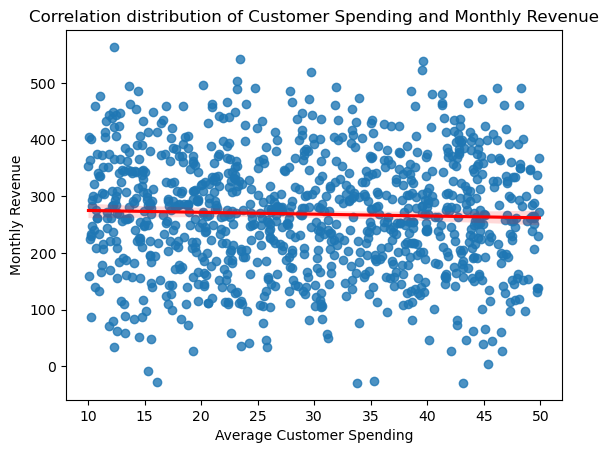

In [53]:
sns.regplot(data= df, x='Average_Customer_Spending', y='Monthly_Revenue', line_kws={"color": "red"})
plt.title('Correlation distribution of Customer Spending and Monthly Revenue')
plt.xlabel('Average Customer Spending')
plt.ylabel('Monthly Revenue')
plt.show()

1. The weak and negative correlation suggests that average customer spending does not have a strong or direct impact on monthly revenue. This implies that other factors are likely more influential in driving monthly revenue.
2. High customer spending does not necessarily translate into higher overall monthly revenue, possibly due to fewer total transactions. It is also possible that restaurants with more transactions at lower average spend can generate more total revenue than those with fewer transactions at higher spend.
3. Given the weak correlation, increasing the number of transactions (customer visits) might be a more effective strategy to boost monthly revenue than focusing solely on increasing average spending per customer.

### 4.30 What is the spread of reviews across dataset ?

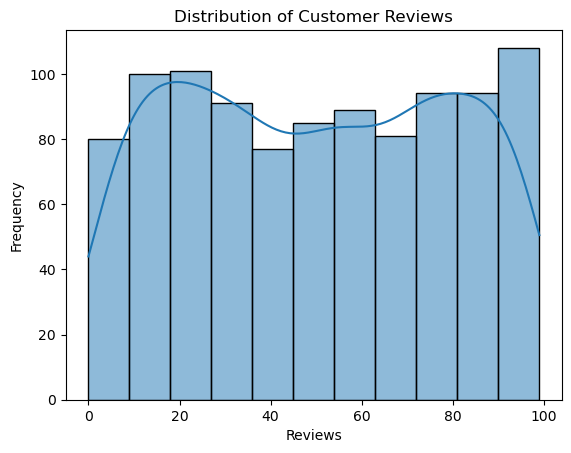

In [54]:
sns.histplot(data = df, x='Reviews', kde = True)
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Reviews')
plt.show()

1. The distribution of reviews appears to be relatively uniform, with each bin (interval) from 0 to 100 reviews having a similar frequency. This suggests a consistent level of customer engagement across the review spectrum.
2. There are slightly higher frequencies around the intervals 0-20, 70-80, and 90-100 reviews. These peaks might indicate particular periods or promotions when customer engagement and reviews were higher.

### 4.31 Do promotions effect number of reviews ? 

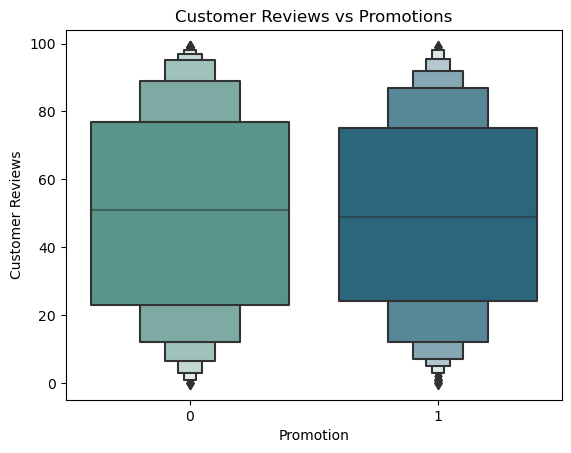

In [55]:
sns.boxenplot(data = df, x='Promotions', y = 'Reviews', palette='crest')
plt.title('Customer Reviews vs Promotions')
plt.xlabel('Promotion')
plt.ylabel('Customer Reviews')
plt.show()

1. Given that the median and IQR of reviews are similar for both promotional and non-promotional periods, promotions may not be significantly driving an increase in customer reviews.
2. It may be beneficial to tailor promotions more specifically to target increased customer engagement and reviews.
3. While promotions may not directly impact review counts, they could be influencing other aspects of customer behavior. Continuous monitoring of customer feedback and engagement during promotional periods can provide deeper insights.

### 4.32 Do promotions influence monthly revenue ?

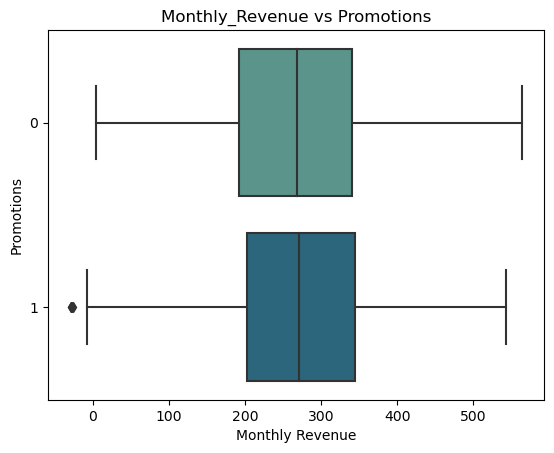

In [56]:
sns.boxplot(data = df, x='Monthly_Revenue', y = 'Promotions', palette='crest', orient = 'h')
plt.title('Monthly_Revenue vs Promotions')
plt.xlabel('Monthly Revenue')
plt.ylabel('Promotions')
plt.show()

1. The median monthly revenue for both promotional and non-promotional periods is approximately the same, around 300. This suggests that, on average, promotions do not significantly impact the median monthly revenue.
2. The IQR, which measures the middle 50% of the data, is also similar for both groups. This indicates that the central tendency of monthly revenue is consistent regardless of promotions, with most values falling between approximately 200 and 400.
3. There is a notable outlier in the promotional group (1) with very low monthly revenue. This could indicate an unusual case or specific conditions that significantly affected revenue during a promotion period.


Given that the median and IQR of monthly revenue are similar for both promotional and non-promotional periods, promotions may not be driving a significant increase in revenue. This suggests the need for a deeper examination of the effectiveness of current promotional strategies. Consider re-evaluating and redesigning promotions to ensure they target factors that can potentially increase revenue. For example, targeted discounts, loyalty programs, or special event promotions might be more effective.

### 4.33 What is the distribution of monthly revenue across dataset ?

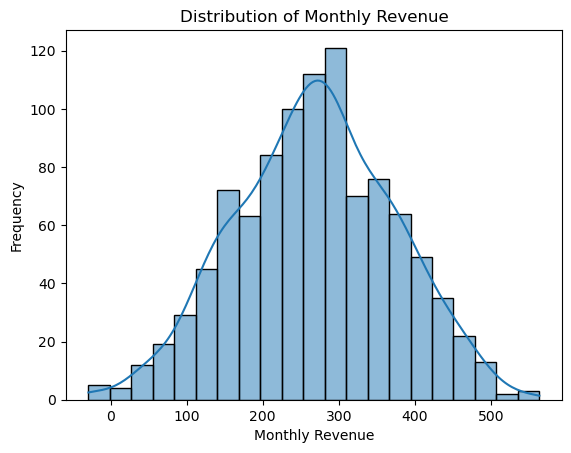

In [57]:
sns.histplot(data = df, x='Monthly_Revenue', kde = True)
plt.xlabel('Monthly Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Monthly Revenue')
plt.show()

1. The distribution of monthly revenue appears to be approximately normally distributed, with a clear peak around the mean value. This indicates that the majority of restaurants have a monthly revenue close to the average, with fewer restaurants earning significantly more or less.
2. he peak of the distribution occurs around the 300 mark, suggesting that the average monthly revenue for most restaurants is approximately 300 units.
3. The spread of the revenue values extends from near 0 to around 500. This wide range indicates variability in the performance of different restaurants, with some achieving significantly higher revenue than others.